# Задача:
A/B-тестированием оценить влияет ли тема оформления на привлекательность сайта для пользователя.
<br>Гипотеза заключается в том, что тёмная тема более привлекательная для наших посетителей, поэтому их сильнее заинтересует наш сайт, следовательно, они проведут на нём больше времени. Уровень значимости равен 5 %.

In [1]:
# Библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Читаем датасет
time_data = pd.read_excel('data/time_data.xlsx')
time_data.head()

,time(A),time(B)
0,435.0,549.2
1,454.5,630.2
2,447.0,437.2
3,480.0,637.2
4,561.0,712.4


Text(0.5, 1.0, 'Распределение времени группы B')

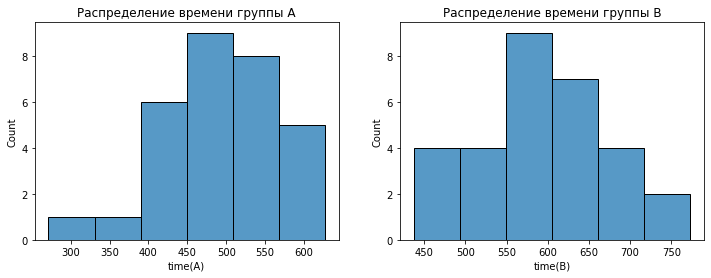

In [8]:
# Строим гистрокамму для визуальной оценки распределения данных

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(x='time(A)', data=time_data, ax=axes[0])
sns.histplot(x='time(B)', data=time_data, ax=axes[1])
axes[0].set_title('Распределение времени группы А')
axes[1].set_title('Распределение времени группы B')

In [10]:
# Тест Шапиро-Уилка для проверки нормального распределения
from scipy.stats import shapiro

shapiro_result_a = shapiro(time_data['time(A)'])
shapiro_result_b = shapiro(time_data['time(B)'])

# Вывод результатов
print('p_value группа А =', round(shapiro_result_a.pvalue, 2))
print('p_value группа B =', round(shapiro_result_b.pvalue, 2))


p_value группа А = 0.43
p_value группа B = 0.12


In [19]:
# С помощью Т-теста проверим гипотезы: посещаемость в А и В равны или посещаемость в А меньше, чем в В (левосторенная = less)
from scipy.stats import ttest_ind

H0 = 'Среднее время посещения в группах одинаково.'
H1 = 'Среднее время посещения в группе А меньше, чем в В.'
alpha = 0.05 # статистическая значимость

results = ttest_ind(
    a = time_data['time(A)'],
    b = time_data['time(B)'],
    alternative = 'less'
)
p_value = results.pvalue
# Выводим значение p_value
print('p_value:', round(p_value, 2))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу. {}'.format(H0))
    print('Альтернативная гипотеза. {}'.format(H1))

else:
    print('Принимаем нулевую гипотезу. {}'.format(H0))


p_value: 0.0
Отвергаем нулевую гипотезу. Среднее время посещения в группах одинаково.
Альтернативная гипотеза. Среднее время посещения в группе А меньше, чем в В.
